In [ ]:
                         """  https://github.com/Shivam1795  """

In [1]:
## Import all the required libraries ##
import cv2
import numpy as np
import matplotlib.pyplot as plt

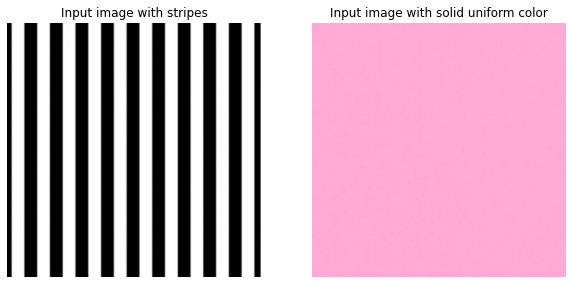

In [2]:
## Read images !!
stripes = cv2.imread('images/stripes.jpg')
solid = cv2.imread('images/solid.jpg')

## Convert to RGB image and resize !!
new_size = (413, 413)
stripes = cv2.resize(cv2.cvtColor(stripes, cv2.COLOR_BGR2RGB), new_size)
solid = cv2.resize(cv2.cvtColor(solid, cv2.COLOR_BGR2RGB), new_size)

## Display images !!
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(stripes); ax1.axis(False); ax1.title.set_text('Input image with stripes')
ax2.imshow(solid);ax2.axis(False); ax2.title.set_text('Input image with solid uniform color');

In [3]:
## Discrete Fourier transformed (DFT) image 1st method ##

def dft_img_m1(norm_img):
    ## Calculate fourier transformation !!
    f = np.fft.fft2(norm_img)
    ## Shift origin of frequency spectrum to the center of the image !! 
    f_shift = np.fft.fftshift(f)
    ## Convert to log scale !!
    spectrum = 20*np.log(np.abs(f_shift))
    
    return(spectrum)

In [4]:
## Convert to Grayscale to focus on the intensity patterns in the image !!
gray_stripes = cv2.cvtColor(stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(solid, cv2.COLOR_RGB2GRAY)

## Normalize the images !!
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

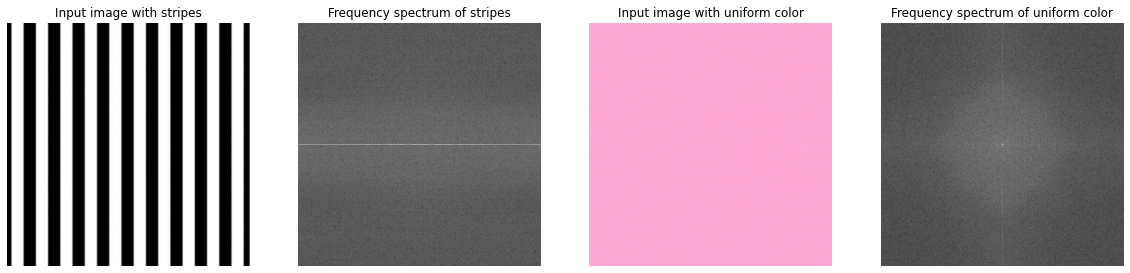

In [5]:
## Compute transformed image using 1st method ##
f_stripes = dft_img_m1(norm_stripes)
f_solid = dft_img_m1(norm_solid)

## Display images !!
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))

ax1.imshow(stripes); ax1.axis(False); ax1.title.set_text('Input image with stripes')
ax2.imshow(f_stripes, cmap='gray'); ax2.axis(False); ax2.title.set_text('Frequency spectrum of stripes')
ax3.imshow(solid);ax3.axis(False); ax3.title.set_text('Input image with uniform color')
ax4.imshow(f_solid, cmap='gray');ax4.axis(False); ax4.title.set_text('Frequency spectrum of uniform color')

In [11]:
## Discrete Fourier transformed (DFT) image 2nd method ##

def dft_img_m2(gray_img):
    ## Calculate fourier transformation !!
    dft = cv2.dft(np.float32(gray_img), flags=cv2.DFT_COMPLEX_OUTPUT)
    ## Shift origin of frequency spectrum to the center of the image !! 
    dft_shift = np.fft.fftshift(dft)
    ## Convert to log scale !!
    spectrum = 20* np.log((cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])))
    
    return spectrum

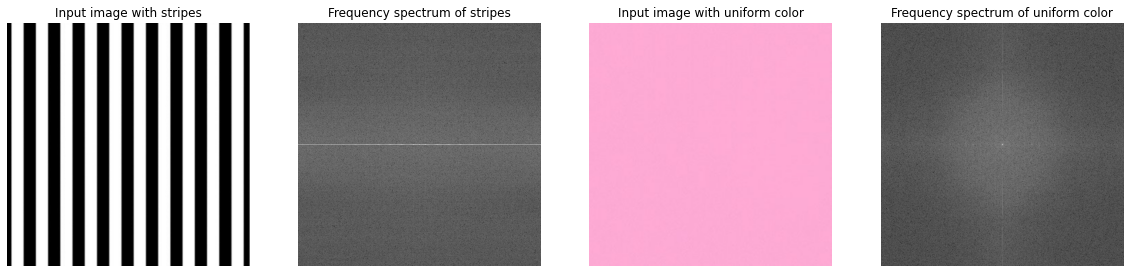

In [12]:
## Compute transformed image using 2nd method ##
f_stripes = dft_img_m2(gray_stripes)
f_solid = dft_img_m2(gray_solid)

## Display images !!
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))

ax1.imshow(stripes); ax1.axis(False); ax1.title.set_text('Input image with stripes')
ax2.imshow(f_stripes, cmap='gray'); ax2.axis(False); ax2.title.set_text('Frequency spectrum of stripes')
ax3.imshow(solid);ax3.axis(False); ax3.title.set_text('Input image with uniform color')
ax4.imshow(f_solid, cmap='gray');ax4.axis(False); ax4.title.set_text('Frequency spectrum of uniform color')

In [8]:
## Thanks !!